# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from functions.preproccessing import clean_columns, split_data, replace_outliers 

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
%matplotlib inline

C:\Users\tom\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
C

In [2]:
from config_and_dependencies.config import * 

# Import data

In [3]:
my_data = pd.read_csv(data_input_path)

<AxesSubplot:xlabel='Site', ylabel='count'>

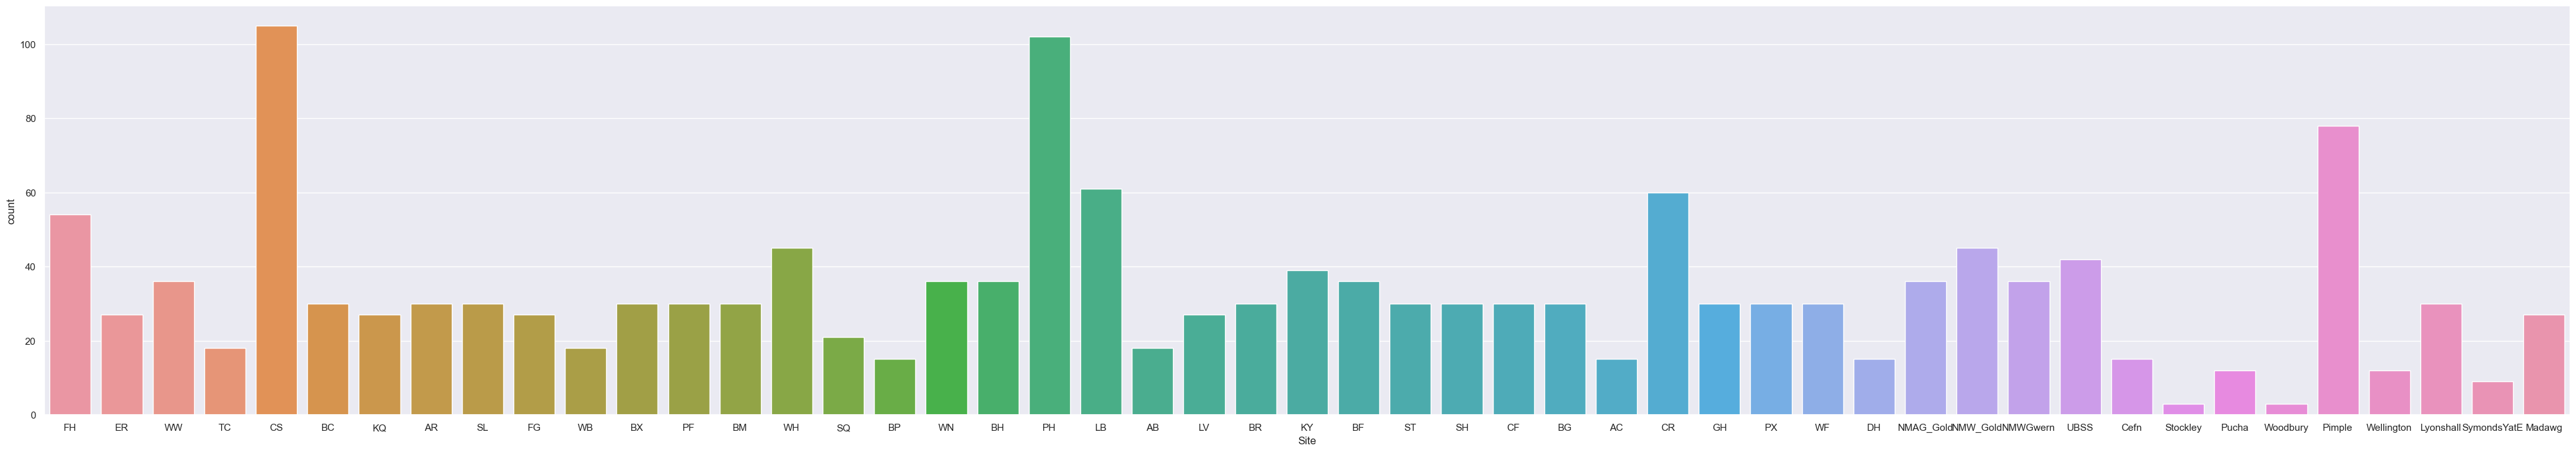

In [4]:
sns.set(rc={'figure.figsize':(50.7,8.27)})
sns.countplot(x=my_data['Site'])

# Remove artefact data

In [5]:
my_data = my_data[my_data['Geology'] !='Artefacts']

# Remove poorly performing Bedrock sites and 'Semi-bedrock sites'

In [6]:
my_data = my_data[my_data['Site']!='BP'] 
my_data = my_data[my_data['Site']!='BX']
my_data = my_data[my_data['Site']!='BM'] 
my_data = my_data[my_data['Site']!='BC'] 
my_data = my_data[my_data['Site']!='BP']

In [7]:
my_data['Site'].unique()

array(['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF',
       'WH', 'SQ', 'WN', 'BH', 'PH', 'LB', 'AB', 'LV', 'BR', 'KY', 'BF',
       'ST', 'SH', 'CF', 'BG', 'AC', 'CR', 'GH', 'PX', 'WF'], dtype=object)

# Site frequencies

In [8]:
site_frequencies_df = pd.DataFrame(my_data.Site.value_counts()).reset_index(drop = False).rename(columns = {'Site':'Number of Observations', 'index':'Site'})
%store site_frequencies_df

Stored 'site_frequencies_df' (DataFrame)


In [9]:
#site_frequencies_df.head()

# Define functions for making target classes for classification

In [10]:
def make_classes_grouped_reduced(row):
    if row['Geology'] == 'Bedrock':
        return(row['Site'])
    elif row['Geology'] == 'Superficial':
        return(row['Region'])
        #if row['Region'] == 'SV' or row['Region'] == 'SE':
        #    return('SV_SE')
        #else:
        #    return(row['Region'])

# targets for classification are made

In [11]:
my_data['class'] = my_data.apply(make_classes_grouped_reduced, axis = 1)

In [12]:
#print(my_data['class'])

# split data into superficial and bedrock geology

In [13]:
my_superficial = my_data[my_data['Geology'] == 'Superficial']
my_data = my_data[my_data['Geology'] != 'Superficial']

In [14]:
my_data['class'].unique()

array(['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF',
       'WH', 'SQ', 'WN', 'BH', 'PH', 'LB'], dtype=object)

In [15]:
my_superficial['class'].unique()

array(['AB', 'LV', 'SV_SE_black', 'BA_black', 'BA_grey', 'SV_SE_grey',
       'WA_grey', 'WA_black', 'MM_black', 'MM_grey'], dtype=object)

# remove '<' signs and commas from feature values

In [16]:
my_data = clean_columns(my_data, 9, -1)    
my_superficial = clean_columns(my_superficial, 9, -1)

Li7


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Be9


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

B11


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Mg24


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Al27


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Si28


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

P31


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

S33


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

K39


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ca42


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Sc45


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ti47


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

V51


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Cr52


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Mn55


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Fe56


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Co59


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ni60


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Cu63


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Zn68


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ga69


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ge72


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

As75


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Rb85


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Sr88


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Y89


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Zr90


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Nb93


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Mo95


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Cd111


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

In115


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Sn118


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Cs133


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ba137


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

La139


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ce140


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Pr141


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Nd146


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Sm147


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Eu153


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Gd157


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Tb159


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Dy163


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ho165


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Er166


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Tm169


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Yb172


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Lu175


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Hf178


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Ta181


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Pb208


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Th232


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

U238


Pandas Apply:   0%|          | 0/703 [00:00<?, ?it/s]

Li7


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Be9


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

B11


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Mg24


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Al27


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Si28


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

P31


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

S33


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

K39


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ca42


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Sc45


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ti47


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

V51


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Cr52


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Mn55


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Fe56


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Co59


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ni60


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Cu63


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Zn68


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ga69


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ge72


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

As75


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Rb85


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Sr88


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Y89


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Zr90


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Nb93


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Mo95


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Cd111


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

In115


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Sn118


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Cs133


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ba137


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

La139


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ce140


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Pr141


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Nd146


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Sm147


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Eu153


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Gd157


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Tb159


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Dy163


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ho165


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Er166


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Tm169


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Yb172


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Lu175


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Hf178


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Ta181


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Pb208


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Th232


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

U238


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

# visualise na values

In [17]:
#sns.set(rc={'figure.figsize':(20.7,50)})
#sns.heatmap(my_data.isna(), cbar=False)

# remove rows where there are all element abundances are na values

In [18]:
my_data = my_data.dropna(subset=my_data.columns.values[9:-1], how = 'all' , axis = 0)
my_superficial = my_superficial.dropna(subset=my_superficial.columns.values[9:-1], how = 'all' , axis = 0)

# Data is split into 'train_data' and 'test_data'
## 'train_data' = bedrock samples (known origin)
## 'test_data' = superficial deposite flint samples where the origin is unknown and to be predicted

In [19]:
my_data_split_geological, my_data_split_superficial = split_data(my_data, 'Geology','Superficial')

# Impute na values with feature mean

In [20]:
for column_name in my_data_split_geological.columns.values[9:-1]:
    my_data_split_geological[column_name] = my_data_split_geological[column_name].fillna(my_data_split_geological[column_name].mean()) 
    
for column_name in my_superficial.columns.values[9:-1]:
    my_superficial[column_name] = my_superficial[column_name].fillna(my_superficial[column_name].mean())


C:\Users\tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Outliers defined as any values that exceed 2 standard deviations from the mean, such values are changed to the mean for that variable

In [21]:
my_data_split_geological = replace_outliers(my_data_split_geological, features_start, features_end, num_stds = 2)
my_superficial = replace_outliers(my_superficial, features_start, features_end, num_stds = 2)

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/696 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

In [22]:
print(my_data_split_geological['Geology'].unique())
print(my_superficial['Geology'].unique())

['Bedrock']
['Superficial']


In [23]:
train_data = my_data_split_geological.copy(deep = True)
test_data = my_superficial.copy(deep = True)

# label encode the class to be predicted

In [24]:
train_data_formodel = train_data[train_data['Geology'] == 'Bedrock'].copy(deep = True)
train_data_formodel['class'], uniques = pd.factorize(train_data_formodel['class'])

# Datasets are stored

In [25]:
%store train_data_formodel
%store train_data
%store test_data
%store my_data
%store my_superficial
%store uniques

Stored 'train_data_formodel' (DataFrame)
Stored 'train_data' (DataFrame)
Stored 'test_data' (DataFrame)
Stored 'my_data' (DataFrame)
Stored 'my_superficial' (DataFrame)
Stored 'uniques' (Index)


# data preproccessing for dimensionality reduction and visualisation¶

## Two datasets are created: one containing just bedrock types, one containing just superficial types

In [26]:
element_data_train_bedrock = train_data[train_data.columns[9:-1]]
element_data_train_superficial = my_superficial[my_superficial.columns[9:-1]]

# features are standardised

In [27]:
my_scaler_train_bedrock = StandardScaler()
my_scaler_train_superficial = StandardScaler()

In [28]:
element_data_train_bedrock_scaled = my_scaler_train_bedrock.fit_transform(element_data_train_bedrock)
element_data_train_superficial_scaled = my_scaler_train_superficial.fit_transform(element_data_train_superficial)

# T-Distributed Stochastic Neighbour Embedding is done on the four datasets

In [29]:
#my_tsne_train = TSNE(n_components=2, n_iter=10000, verbose=3, random_state=random_seed_state).fit_transform(element_data_train_scaled)
my_tsne_bedrock_train = TSNE(n_components=2, n_iter=10000, verbose=3, random_state=random_seed_state).fit_transform(element_data_train_bedrock_scaled)
my_tsne_superficial_train = TSNE(n_components=2, n_iter=10000, verbose=3, random_state=random_seed_state).fit_transform(element_data_train_superficial_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 696 samples in 0.002s...
[t-SNE] Computed neighbors for 696 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 696 / 696
[t-SNE] Mean sigma: 2.194450
[t-SNE] Computed conditional probabilities in 0.025s


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] Iteration 50: error = 72.6145859, gradient norm = 0.4021802 (50 iterations in 0.288s)
[t-SNE] Iteration 100: error = 73.0112534, gradient norm = 0.3905257 (50 iterations in 0.283s)
[t-SNE] Iteration 150: error = 72.5663605, gradient norm = 0.4193480 (50 iterations in 0.328s)
[t-SNE] Iteration 200: error = 73.5665207, gradient norm = 0.4036619 (50 iterations in 0.292s)
[t-SNE] Iteration 250: error = 74.1057205, gradient norm = 0.3846155 (50 iterations in 0.300s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.105721
[t-SNE] Iteration 300: error = 1.2320886, gradient norm = 0.0046994 (50 iterations in 0.198s)


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] Iteration 350: error = 1.1329243, gradient norm = 0.0006182 (50 iterations in 0.208s)
[t-SNE] Iteration 400: error = 1.1012520, gradient norm = 0.0007823 (50 iterations in 0.185s)
[t-SNE] Iteration 450: error = 1.0894717, gradient norm = 0.0004048 (50 iterations in 0.186s)
[t-SNE] Iteration 500: error = 1.0854782, gradient norm = 0.0001638 (50 iterations in 0.196s)
[t-SNE] Iteration 550: error = 1.0824929, gradient norm = 0.0002203 (50 iterations in 0.189s)
[t-SNE] Iteration 600: error = 1.0806736, gradient norm = 0.0001727 (50 iterations in 0.202s)
[t-SNE] Iteration 650: error = 1.0798759, gradient norm = 0.0001107 (50 iterations in 0.195s)
[t-SNE] Iteration 700: error = 1.0795071, gradient norm = 0.0001133 (50 iterations in 0.210s)
[t-SNE] Iteration 750: error = 1.0786992, gradient norm = 0.0001281 (50 iterations in 0.202s)
[t-SNE] Iteration 800: error = 1.0778770, gradient norm = 0.0001705 (50 iterations in 0.220s)
[t-SNE] Iteration 850: error = 1.0757366, gradient norm = 0.

C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] Iteration 100: error = 69.6638565, gradient norm = 0.4785686 (50 iterations in 0.163s)
[t-SNE] Iteration 150: error = 69.4635468, gradient norm = 0.5012308 (50 iterations in 0.160s)
[t-SNE] Iteration 200: error = 69.1313248, gradient norm = 0.4979854 (50 iterations in 0.166s)
[t-SNE] Iteration 250: error = 70.0408859, gradient norm = 0.4751097 (50 iterations in 0.184s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.040886


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] Iteration 300: error = 0.9154649, gradient norm = 0.0039472 (50 iterations in 0.185s)
[t-SNE] Iteration 350: error = 0.8734978, gradient norm = 0.0004912 (50 iterations in 0.129s)
[t-SNE] Iteration 400: error = 0.8634536, gradient norm = 0.0002614 (50 iterations in 0.113s)
[t-SNE] Iteration 450: error = 0.8591237, gradient norm = 0.0001694 (50 iterations in 0.121s)
[t-SNE] Iteration 500: error = 0.8576637, gradient norm = 0.0001098 (50 iterations in 0.115s)
[t-SNE] Iteration 550: error = 0.8572168, gradient norm = 0.0000794 (50 iterations in 0.113s)
[t-SNE] Iteration 600: error = 0.8564315, gradient norm = 0.0000816 (50 iterations in 0.125s)
[t-SNE] Iteration 650: error = 0.8564563, gradient norm = 0.0000938 (50 iterations in 0.140s)
[t-SNE] Iteration 700: error = 0.8563209, gradient norm = 0.0001106 (50 iterations in 0.159s)
[t-SNE] Iteration 750: error = 0.8561734, gradient norm = 0.0000688 (50 iterations in 0.123s)
[t-SNE] Iteration 800: error = 0.8562446, gradient norm = 0.

# the t-SNE dimensions for the four datasets are put into dataframes

In [30]:
tsne_df_bedrock_train = pd.DataFrame(data = my_tsne_bedrock_train, columns = ['tsne1', 'tsne2'])
tsne_df_superficial_train = pd.DataFrame(data = my_tsne_superficial_train, columns = ['tsne1', 'tsne2'])

# datasets are stored for the purpose of two-dimensional visualisations

In [31]:
#%store tsne_df_train
%store tsne_df_bedrock_train
%store tsne_df_superficial_train
%store my_superficial

Stored 'tsne_df_bedrock_train' (DataFrame)
Stored 'tsne_df_superficial_train' (DataFrame)
Stored 'my_superficial' (DataFrame)
